In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 
import pandas as pd

In [44]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

In [45]:
G=nx.read_edgelist('data\\ca-netscience.txt', nodetype=int)
pos=nx.spring_layout(G,iterations=30)

In [46]:
dt1=pd.read_csv('data\\targets1.csv') 
dt1.head()

,target
0,291
1,100
2,167
3,168
4,169


In [47]:
targets=list(dt1['target'])

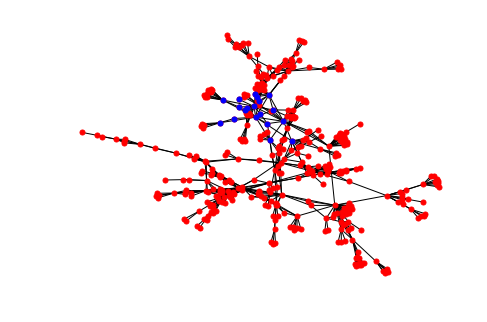

In [48]:
pos=nx.spring_layout(G,iterations=50)
nx.draw(G,pos,node_size=25,with_labels=False)
nx.draw_networkx_nodes(G,pos,
                       nodelist=targets,
                       node_color='b',node_size=25)

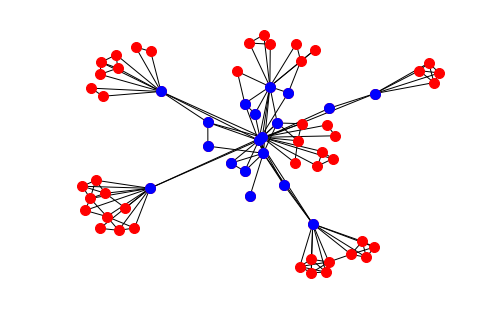

In [49]:
neighbors=[]
for node in targets: 
    neighbors=neighbors+list(G[node])
sG=G.subgraph(neighbors+targets)

pos=nx.spring_layout(sG,iterations=50)
nx.draw(sG,pos,node_size=100,with_labels=False)
nx.draw_networkx_nodes(sG,pos,
                       nodelist=targets,
                       node_color='b',node_size=100)

#plt.savefig('fig2.png')

In [50]:
dt2=pd.read_csv('data\\spreading1.csv') 
dt2.head()

,node,spreading ability
0,1,0.000342
1,4,0.000553
2,5,0.000658
3,16,0.000184
4,44,0.001211


Text(0,0.5,'log(s)')

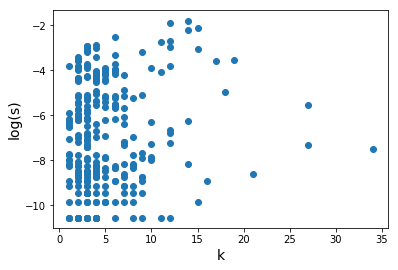

In [51]:
nodes=list(np.array(dt2['node']))
G.degree(nodes)
degrees=np.array([d for node, d in G.degree(nodes)])
s=np.array(dt2['spreading ability'])
plt.scatter(degrees,np.log(s))
plt.xlabel('k',fontsize=14)
plt.ylabel(r'log(s)',fontsize=14)

In [52]:
print(pearsonr(degrees,s))
print(spearmanr(degrees,s))
print(kendalltau(degrees,s))

(0.23705944978561855, 4.409525307263454e-05)
SpearmanrResult(correlation=0.12074161545767903, pvalue=0.03955472999726561)
KendalltauResult(correlation=0.08738078240981541, pvalue=0.036519007457697865)
